<h3> 251201 실습</h3>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
plt.rcParams['font.family'] = "HCR Dotum" # 한글 인코딩 옵션

In [4]:
gold = [2, 6, 6, 3, 5, 2]
year = [str(y) + "년" for y in range(2002, 2023, 4)]
year

['2002년', '2006년', '2010년', '2014년', '2018년', '2022년']

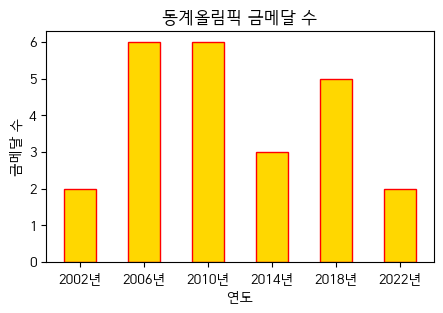

In [19]:
fig, ax = plt.subplots(figsize=(5,3)) # 그래프 그려주는 객체 생성  figsize(가로,세로)
ax.bar(year, gold, color = 'gold', edgecolor = 'red', width=0.5) # 필수형식, 리스트로 구성된 x축과 y축에 넣을 데이터 삽입
ax.set_title("동계올림픽 금메달 수")
ax.set_xlabel("연도")
ax.set_ylabel("금메달 수")
plt.show()


In [20]:
df = pd.read_excel("K팀 대학 생활 만족도 설문(응답).xlsx")
df.iloc[:4, :7]
df.head()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,1,남자,3학년,인사대,6,그렇다,보통,불만족,만족,3,학생회
1,2,여자,1학년,디자인대,6,그렇다,만족,만족,보통,3,아직은 모르겠다.
2,3,여자,1학년,과기대,6,그렇다,보통,보통,보통,4,모람제
3,4,여자,1학년,인사대,5,보통,만족,매우 불만족,보통,3,아직 없는듯
4,5,남자,1학년,과기대,6,그렇다,매우 불만족,매우 만족,만족,4,"동아리,소모임"


In [21]:
# crosstab tbl 저장 형식 -> DataFrame
tbl = pd.crosstab(df.Q6, columns = 'count')
tbl

col_0,count
Q6,
만족,13
매우 만족,5
매우 불만족,5
보통,7
불만족,9


In [22]:
type(tbl)

pandas.core.frame.DataFrame

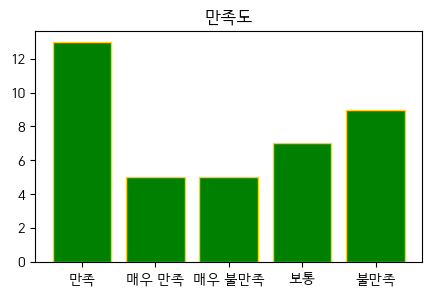

In [29]:
fig, ax = plt.subplots(figsize=(5,3)) # 그래프 그려주는 객체 생성  figsize(가로,세로)

ax.bar(tbl.index, tbl['count'], color = 'green', edgecolor = 'gold') # 필수형식, 리스트로 구성된 x축과 y축에 넣을 데이터 삽입
# 왜 tbl.count는 안 되고, tbl['count']로 적어야 할까?
ax.set_title("만족도")
plt.show()


In [ ]:
tbl2 = tbl.iloc[[2,4,3,0,1], :] # 원래 있던 tbl의 결과에서 순서만 변경하여 추춯
tbl2

col_0,count
Q6,
매우 불만족,5
불만족,9
보통,7
만족,13
매우 만족,5


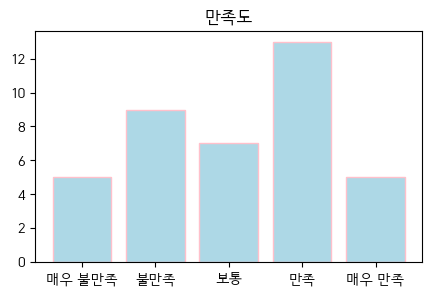

In [33]:
fig, ax = plt.subplots(figsize=(5,3)) # 그래프 그려주는 객체 생성  figsize(가로,세로)

ax.bar(tbl2.index, tbl2['count'], color = 'lightblue', edgecolor = 'pink') # 필수형식, 리스트로 구성된 x축과 y축에 넣을 데이터 삽입
# 왜 tbl.count는 안 되고, tbl['count']로 적어야 할까?
ax.set_title("만족도")

plt.show()


In [35]:
tbl = pd.crosstab(df.Q3, columns='count')
tbl

col_0,count
Q3,
과기대,23
디자인대,8
딘자인대,1
인사대,9


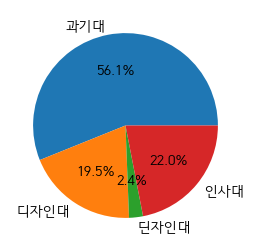

In [41]:
fig, ax = plt.subplots(figsize=(6,3))

ax.pie(tbl['count'], labels = tbl.index, autopct="%1.1f%%")
#autopct = 비율에 따라서 많은 것은 더 넓게 좁은 것은 더 좁게.. 
plt.show()

In [43]:
df = pd.read_excel("고속터미널-25-10.xlsx")
df

,date,line,stn,geton,getoff
0,20251001,3호선,고속터미널,46131,45906
1,20251001,7호선,고속터미널,17910,16294
2,20251001,9호선,고속터미널,15793,20362
3,20251002,3호선,고속터미널,53507,66014
4,20251002,7호선,고속터미널,19734,18442
...,...,...,...,...,...
88,20251030,7호선,고속터미널,18499,16164
89,20251030,9호선,고속터미널,16407,20940
90,20251031,3호선,고속터미널,58103,57720
91,20251031,7호선,고속터미널,22087,17232


In [45]:
data = df[['line', 'geton', 'getoff']]
data

,line,geton,getoff
0,3호선,46131,45906
1,7호선,17910,16294
2,9호선,15793,20362
3,3호선,53507,66014
4,7호선,19734,18442
...,...,...,...
88,7호선,18499,16164
89,9호선,16407,20940
90,3호선,58103,57720
91,7호선,22087,17232


In [50]:
grp = data.groupby("line")
result = round(grp.mean(), 1)
result

# if, data로 쓰지 않으면 역이름과 같은 컬럼들은 평균을 구할 수 없으므로, 평균을 구할 수 있는 값들만 선별하여 data var에 저장

,geton,getoff
line,,
3호선,49513.4,48062.3
7호선,17570.5,13772.8
9호선,15384.5,20842.8


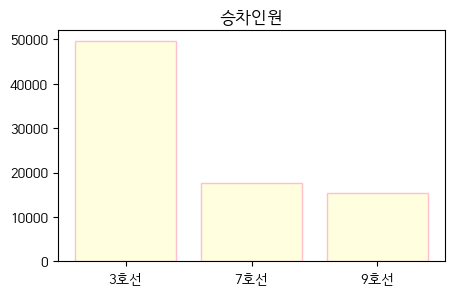

In [57]:
fig, ax = plt.subplots(figsize=(5,3)) # 그래프 그려주는 객체 생성  figsize(가로,세로)

ax.bar(result.index, result['geton'], color = 'lightyellow', edgecolor = 'pink') # 필수형식, 리스트로 구성된 x축과 y축에 넣을 데이터 삽입
# 왜 tbl.count는 안 되고, tbl['count']로 적어야 할까?

ax.set_title("승차인원")

plt.show()


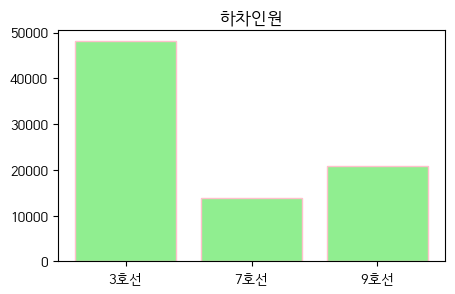

In [56]:
fig, ax = plt.subplots(figsize=(5,3)) # 그래프 그려주는 객체 생성  figsize(가로,세로)

ax.bar(result.index, result['getoff'], color = 'lightgreen', edgecolor = 'pink') # 필수형식, 리스트로 구성된 x축과 y축에 넣을 데이터 삽입
# 왜 tbl.count는 안 되고, tbl['count']로 적어야 할까?

ax.set_title("하차인원")

plt.show()


In [58]:
result

,geton,getoff
line,,
3호선,49513.4,48062.3
7호선,17570.5,13772.8
9호선,15384.5,20842.8


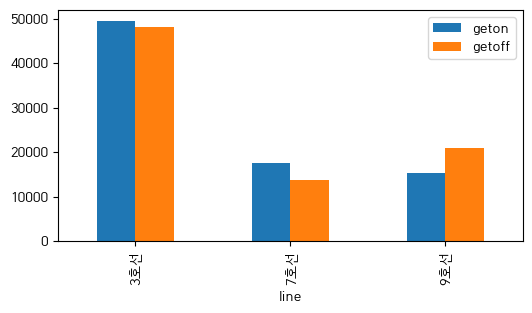

In [63]:
# plt 내의 graph method
# 수평 누적 막대그래프
result.plot.bar(figsize=(6,3))
plt.show()

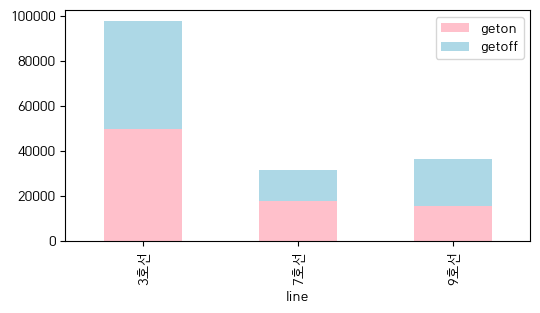

In [69]:
# plt 내의 graph method
# 수평 누적 막대그래프
result.plot.bar(stacked = True, figsize=(6,3), color = ['pink', 'lightblue'])
plt.show()

In [70]:
data = np.random.normal(100, 20, 1000)
data[:10]

array([119.34838621, 147.31010655,  99.47913647,  96.27184517,
        94.94326749,  77.54365999,  99.4150303 ,  96.24181057,
        99.72498494,  87.92998933])

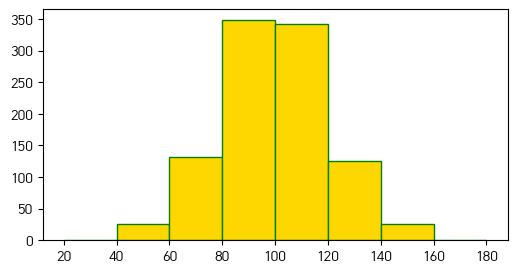

In [ ]:
fig, ax = plt.subplots(figsize = (6,3))

ax.hist(data, bins=range(20, 200, 20), color='gold', edgecolor='green')
# 계급구간과 계급의 간격 , 최소, 최대 각 계급의 간격
plt.show()

In [80]:
[min(data), max(data)]

[np.float64(38.89630266222832), np.float64(158.0266324148389)]

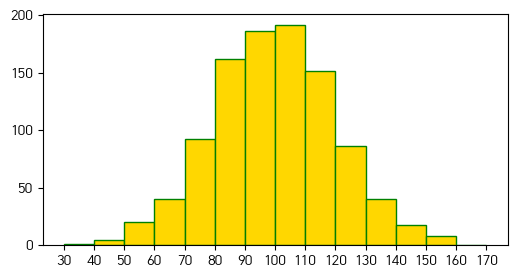

In [87]:
fig, ax = plt.subplots(figsize = (6,3))

ax.hist(data, bins=range(30, 180, 10), color='gold', edgecolor='green')
# 계급구간과 계급의 간격 , 최소, 최대 각 계급의 간격
ax.set_xticks(range(30, 180, 10)) # x축의 눈금을 계급구간에 맞게 바꾸기
plt.show()

In [108]:
df = pd.read_csv("서울시대기오염_2025-10(UTF-8).csv")
df.columns = ['date', 'point', 'pm', 'fpm', 'ozon']
df.tail()

,date,point,pm,fpm,ozon
1545,20251031,한강대로,50.0,30.0,0.0192
1546,20251031,항동,38.0,26.0,0.0216
1547,20251031,행주,29.0,18.0,0.0251
1548,20251031,홍릉로,35.0,24.0,0.0196
1549,20251031,화랑로,36.0,22.0,0.0191


In [110]:
data = df[df.date == 20251031]
data

,date,point,pm,fpm,ozon
1500,20251031,강남구,36.0,19.0,0.0227
1501,20251031,강남대로,47.0,27.0,0.0141
1502,20251031,강동구,41.0,25.0,0.0244
1503,20251031,강변북로,42.0,26.0,0.0153
1504,20251031,강북구,31.0,18.0,0.0297
1505,20251031,강서구,39.0,22.0,0.0210
1506,20251031,공항대로,38.0,20.0,0.0183
1507,20251031,관악구,32.0,21.0,0.0264
1508,20251031,관악산,31.0,14.0,0.0625
1509,20251031,광진구,33.0,22.0,0.0284


In [111]:
data [['pm', 'fpm']].agg(['min', 'max'])

,pm,fpm
min,23.0,14.0
max,50.0,33.0


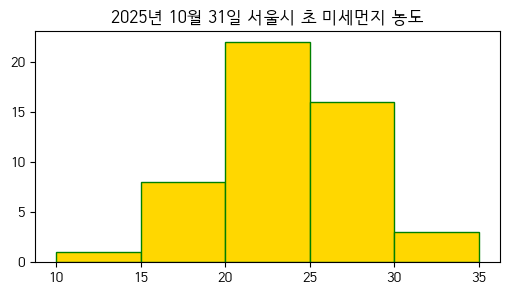

In [112]:
fig, ax = plt.subplots(figsize = (6,3))

ax.hist(data['fpm'], bins=range(10, 40, 5), color='gold', edgecolor='green')
# 계급구간과 계급의 간격 , 최소, 최대 각 계급의 간격
ax.set_title("2025년 10월 31일 서울시 초 미세먼지 농도")
plt.show()

In [114]:
# 강남구와 강서구 데이터를 추출 후 사분위수 구하기 

gn = df[df.point == "강남구"]
gs = df[df.point == "강서구"]

In [116]:
nam = gn['pm'].quantile([0.25, 0.5, 0.75])
seo = gs['pm'].quantile([0.25, 0.5, 0.75])

qtable = pd.DataFrame(
    {"강남구": nam, "강서구": seo}
)

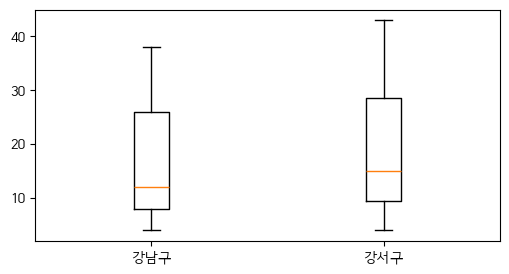

In [123]:
fig, ax= plt.subplots(figsize=(6,3))

ax.boxplot([gn['pm'], gs['pm']], tick_labels=["강남구", "강서구"])

plt.show()